# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
# import the necessary modules

import pickle
import random
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from scipy.misc import imresize
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# configurable constants
EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 0.001
CONV_FILTER_SIZE = (5, 5)
MODEL_NAME = './traffic_signal_classifier'
NEW_TEST_FOLDER = './new_images/'
# 1 - min max normalisation 
# 2 - zero mean and unit std variance (centering)
PREPROCESS_STEP = 2

---
## Step 0: Load The Data


In [3]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]
size_train = X_train.shape[0]*X_train.shape[1]*X_train.shape[2]*X_train.shape[3] + y_train.shape[0]
# TODO: Number of validation examples
n_validation = X_valid.shape[0]
size_valid = X_valid.shape[0]*X_valid.shape[1]*X_valid.shape[2]*X_valid.shape[3] + y_valid.shape[0]
# TODO: Number of testing examples.
n_test = X_test.shape[0]
size_test = X_test.shape[0]*X_test.shape[1]*X_test.shape[2]*X_test.shape[3] + y_test.shape[0]
# TODO: What's the shape of an traffic sign image?
# width height
image_shape = (X_train.shape[1],  X_train.shape[2])
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Shape of training set = ", X_train.shape)
print("Size of training set in bytes =", size_train)
print("")
print("Number of testing examples =", n_test)
print("Shape of testing set = ", X_test.shape)
print("Size of testing set in bytes =", size_test)
print("")
print("Number of Validation examples =", n_validation)
print("Shape of Validation set = ", X_valid.shape)
print("Size of Validation set in bytes =", size_valid)
print("")
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Shape of training set =  (34799, 32, 32, 3)
Size of training set in bytes = 106937327

Number of testing examples = 12630
Shape of testing set =  (12630, 32, 32, 3)
Size of testing set in bytes = 38811990

Number of Validation examples = 4410
Shape of Validation set =  (4410, 32, 32, 3)
Size of Validation set in bytes = 13551930

Image data shape = (32, 32)
Number of classes = 43


---
## Question 1: Provide a basic summary of the data set.
 
Answer: I used the numpy library to calculate summary statistics of the traffic signs data set.
All the data is on type uint8 which has size of 1 byte.

- The size of training set is (34799*32*32*3 + 34799) bytes = 106937327 bytes
- The size of the validation set is (4410*32*32*3 + 4410) bytes = 13551930 bytes
- The size of test set is (12630*32*32*3 + 12630) bytes = 38811990 bytes
- The shape of a traffic sign image is 32x32.
- The number of unique classes/labels in the data set is 43.

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

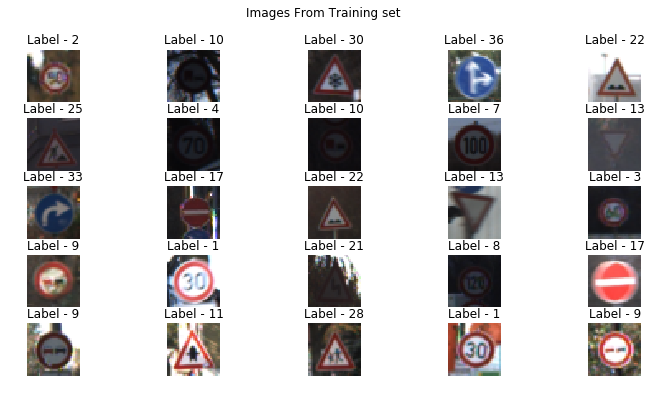

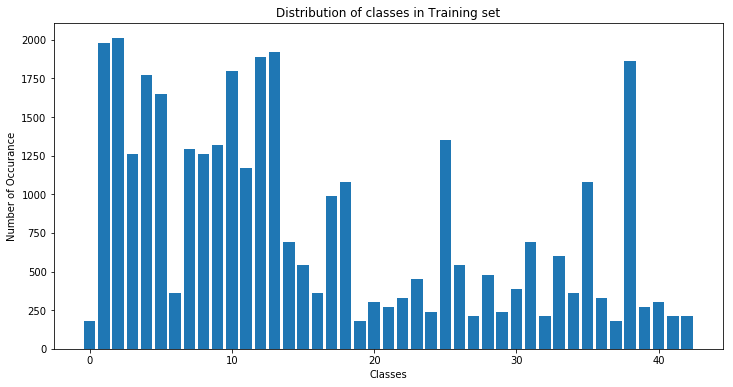

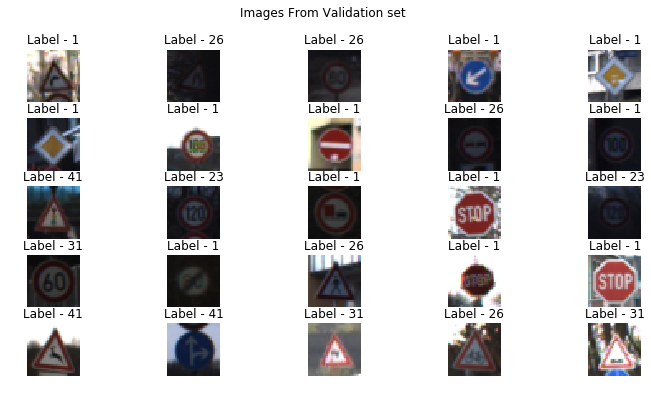

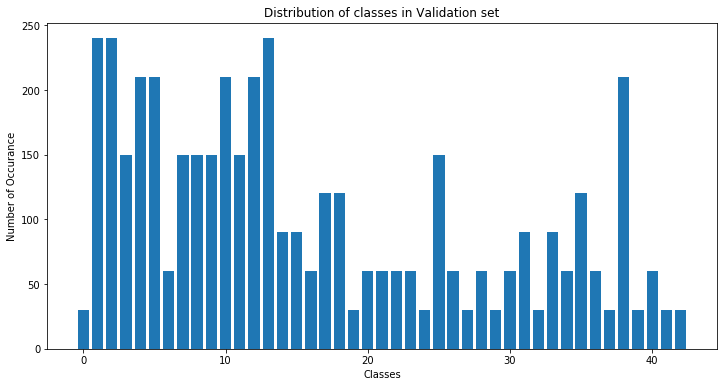

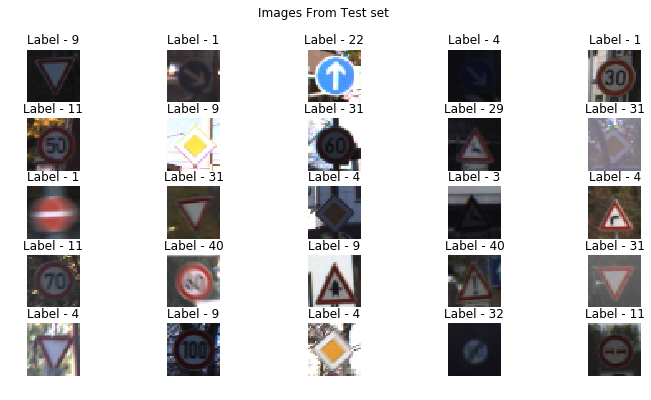

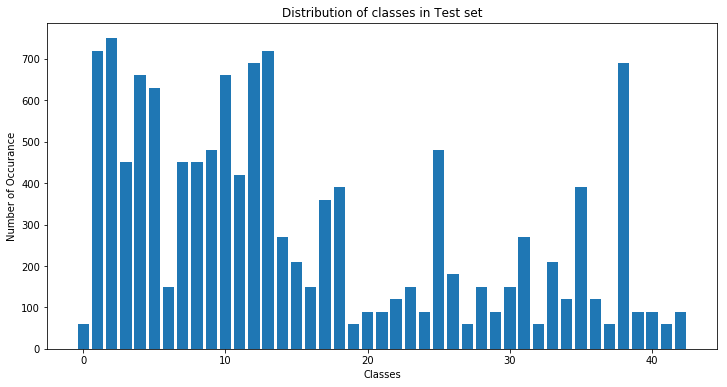

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
def plot_images(set_to_use, num_rows, num_cols, major_title, index_list=[]):
    if len(index_list) == 0:
        index_list = random.sample(range(0,  len(set_to_use)), num_rows*num_cols)
    fig = plt.figure(figsize=(12, 6)) 
    for each_run, each_index in enumerate(index_list):
        each_image = set_to_use[each_index].squeeze()
        plt.subplot(num_rows, num_cols, each_run+1)
        plt.imshow(each_image)
        plt.axis("off")
        plt.title('Label - ' + str(y_train[each_index]))
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    plt.suptitle(major_title)
    plt.show()
    return index_list

def create_histogram(set_to_use, title_hist):
    plt.figure(figsize=(12, 6))
    num_of_classes = 43
    class_count= np.bincount(set_to_use)
    plt.bar(range(0, num_of_classes), class_count)
    plt.title(title_hist)
    plt.xlabel('Classes')
    plt.ylabel('Number of Occurance')
    plt.show()

# plot random images from training set
plotted_images_train = plot_images(X_train, 5, 5, "Images From Training set")
create_histogram(y_train, "Distribution of classes in Training set")

# plot random images from Validation set
plotted_images_valid = plot_images(X_valid, 5, 5, "Images From Validation set")
create_histogram(y_valid, "Distribution of classes in Validation set")

# plot random images from Test set
plotted_images_test = plot_images(X_test, 5, 5, "Images From Test set")
create_histogram(y_test, "Distribution of classes in Test set")


----
## Question 2:  Include an exploratory visualization of the dataset.
Answer: Included above

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

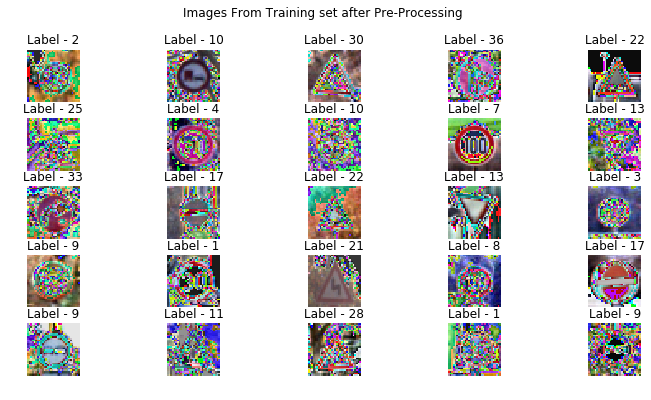

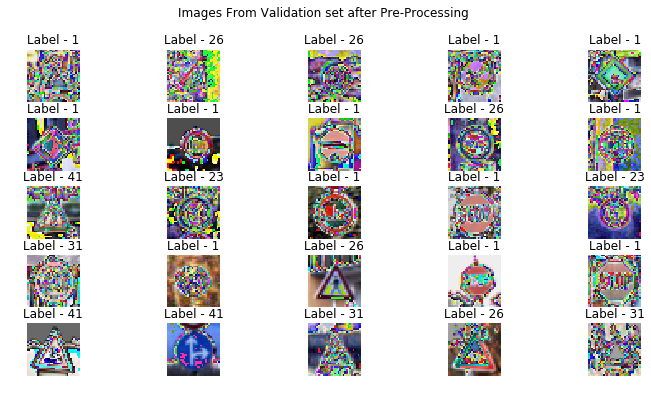

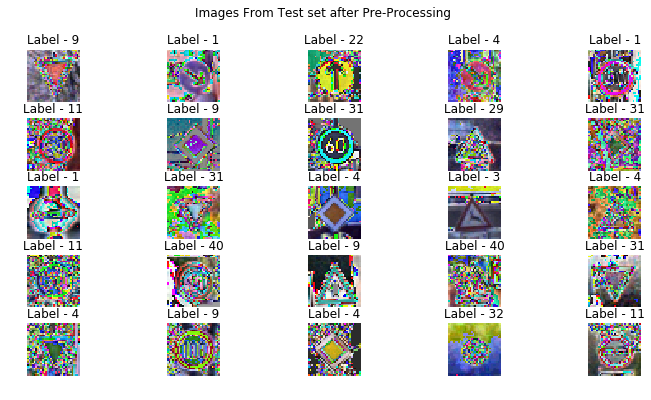

[12331,
 3509,
 4531,
 6875,
 3947,
 8982,
 11787,
 822,
 10577,
 757,
 3183,
 556,
 7469,
 5523,
 8361,
 9554,
 4267,
 11312,
 4241,
 842,
 7472,
 11343,
 6856,
 10210,
 8639]

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def convert_to_greyscale(set_to_use):
    converted_set = np.empty((set_to_use.shape[0],set_to_use.shape[1], set_to_use.shape[2]))
    for each_run, each_member in enumerate(set_to_use):
        converted_set[each_run] = cv.cvtColor(set_to_use[each_run], cv.COLOR_BGR2GRAY)
    return converted_set

def min_max_normalisation(set_to_use):
    for each_run, each_member in enumerate(set_to_use):
        min_value = np.min(set_to_use[each_run])
        max_value  = np.max(set_to_use[each_run])
        set_to_use[each_run] -= min_value
        set_to_use[each_run] /= (max_value - min_value)

def centering_image_data(set_to_use):
    for each_run, each_member in enumerate(set_to_use):
        set_to_use[each_run] -= np.mean(set_to_use[each_run])
        set_to_use[each_run] /= np.std(set_to_use[each_run])

def pre_process_data(set_to_use):
    if PREPROCESS_STEP == 1:
        min_max_normalisation(set_to_use)
    elif PREPROCESS_STEP == 2:
        centering_image_data(set_to_use)


# preprocessing the image data to zero mean and std. variance - 1 across each channel
X_train = X_train.astype(np.float64)
X_valid = X_valid.astype(np.float64)
X_test = X_test.astype(np.float64)
pre_process_data(X_train)
pre_process_data(X_valid)
pre_process_data(X_test)
#plotting the state of images after pre processing
plot_images(X_train, 5, 5, "Images From Training set after Pre-Processing", plotted_images_train)
plot_images(X_valid, 5, 5, "Images From Validation set after Pre-Processing", plotted_images_valid)
plot_images(X_test, 5, 5, "Images From Test set after Pre-Processing", plotted_images_test)


### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x, filter_size):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # Hyperparameters
    mu = 0
    sigma = 0.1
    #  Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    wc1 = tf.Variable(tf.truncated_normal(shape=(filter_size[0], filter_size[0], 3, 6),
                                          mean = mu, stddev = sigma))
    bc1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, wc1, [1,1,1,1], 'VALID') + bc1
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')
    # Layer 2: Convolutional. Output = 10x10x16.
    # Max Pooling. Input = 10x10x16. Output = 5x5x16.
    wc2 = tf.Variable(tf.truncated_normal(shape=(filter_size[0], filter_size[0], 6, 16),
                                          mean = mu, stddev = sigma))
    bc2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, wc2, [1,1,1,1], 'VALID') + bc2
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Fully Connected layer 1. Input = 400. Output = 120.
    fcw1 = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    fcb1 = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fcw1) + fcb1
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    
    # Fully Connected layer 2. Input = 120. Output = 84.
    fcw2 = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fcb2 = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fcw2) + fcb2
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
       
    # Fully Connected layer 3. Input = 84. Output = 43.
    fcw3 = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fcb3 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fcw3) + fcb3   
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

EPOCH 1 ...
Training Accuracy = 0.730
Validation Accuracy = 0.694
EPOCH 6 ...
Training Accuracy = 0.964
Validation Accuracy = 0.932
EPOCH 11 ...
Training Accuracy = 1.000
Validation Accuracy = 0.943
EPOCH 16 ...
Training Accuracy = 0.982
Validation Accuracy = 0.952
EPOCH 21 ...
Training Accuracy = 1.000
Validation Accuracy = 0.959
EPOCH 25 ...
Training Accuracy = 1.000
Validation Accuracy = 0.960
Model saved
 
Mean Training Accuracy - 0.977657659054
Mean Validation Accuracy - 0.932172335637


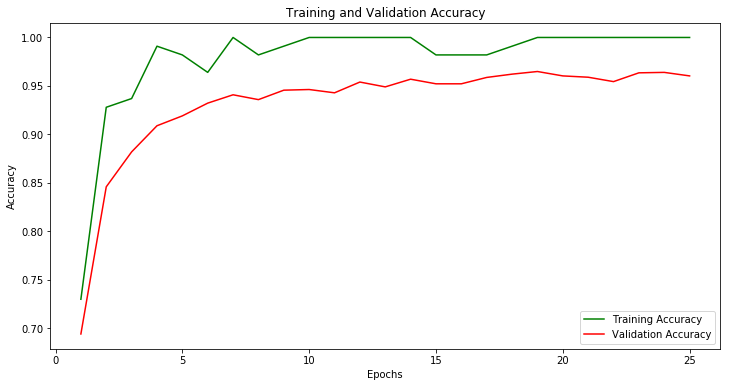

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, CONV_FILTER_SIZE)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        valid_loss, valid_accuracy = sess.run([loss_operation, accuracy_operation],
                                              feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (valid_accuracy * len(batch_x))        
    return total_accuracy / num_examples

# training 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    training_accuracy_list = []
    validation_accuracy_list = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        training_accuracy = 0
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run([training_operation, accuracy_operation], 
                     feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        
        _, training_accuracy = sess.run([loss_operation, accuracy_operation],
                                              feed_dict={x: batch_x, y: batch_y , keep_prob: 1.0})
        validation_accuracy = evaluate(X_valid, y_valid)
        
        training_accuracy_list.append(training_accuracy)
        validation_accuracy_list.append(validation_accuracy)
        if i%5 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))        
        
    saver.save(sess, MODEL_NAME)
    print("EPOCH {} ...".format(i+1))
    print("Training Accuracy = {:.3f}".format(training_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))   
    print("Model saved")
print(' ')
print('Mean Training Accuracy - ' + str(sum(training_accuracy_list)/float(len(training_accuracy_list))))
print('Mean Validation Accuracy - ' + str(sum(validation_accuracy_list)/float(len(validation_accuracy_list))))

# accuracy graph
fig = plt.figure(figsize=(12, 6)) 
epoch_list = range(1, EPOCHS+1)
plt.plot(epoch_list, training_accuracy_list, label='Training Accuracy',color='green')
plt.plot(epoch_list, validation_accuracy_list, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [9]:
# run the model on the test data
with tf.Session() as sess:
    saver.restore(sess, MODEL_NAME)

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.946


---
## Question 3:  Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. 

Answer: 
- As a pre processing step, the image data was normalised to have zero mean and unit variance. For this step, mean and standard deviation of image intensities were calculated. Mean intensity value was subtracted from each pixel intensity and obtained result was divided by standard deviation of image intensities.
- This pre processing step was done to bring the input data to a particular range which will be helpful in later steps for algorithms like Gradient descent to converge quickly. 
- Didn't do grey scaling because it would reduce the image information from 3 channels to a single channel and the deep neural network works better with more information. Since the feature are also derived from the data, wanted to provide more information about the image to the network.

## Question 4: Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

Answer: I have used LeNet architecture to train the deep neural network. The architecture is as follows

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution        	| Filter shape - [5, 5, 3, 6] ,stride - [1,1,1,1], valid padding, outputs 28x28x6|
| RELU					| Input and output of shape 28x28x6 			|
| Max pooling	      	| Filter shape - [1, 2, 2, 1] ,stride - [1,2,2,1], valid padding, outputs 14x14x6| 				
| 2nd Convolution  	    | Filter shape - [5, 5, 6, 16] ,stride - [1,1,1,1], valid padding, outputs 10x10x16|  
| RELU					| Input and output of shape 10x10x16 			|    									
| Max pooling	      	| Filter shape - [1, 2, 2, 1] ,stride - [1,2,2,1], valid padding, outputs 5x5x16| 				
| Fully connected		| Input - 400 output - 120						|
| RELU					| Input and output - 120			            | 
| Droupout				| Input and output - 120 (keep_prob = 0,5)      | 
| Fully connected		| Input - 120 output - 84						|
| RELU					| Input and output - 84			                | 
| Droupout				| Input and output - 84 (keep_prob = 0,5)       | 
| Fully connected		| Input - 84 output - 43						|
| Softmax				| Outputs the predicted traffic sign class	    |
|						|												|


## Question 4: Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

Answer: To train the model, I used the following 
- Optimizer - AdamOptimizer
- Batch size - 128
- Number of epochs - 25
- Learning rate - 0.001
- Weights and bias for the network were drawn from a random normal distribution with mean = 0, standard deviation = 0.1.

## Question 5. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

Answer: My final model results were:
* average training set accuracy of 97.7%
* average validation set accuracy of 93.2%
* test set accuracy of 94.6%

If a well known architecture was chosen:
* What architecture was chosen?
LeNet Architecture was used to train the network. 
* Why did you believe it would be relevant to the traffic sign application?
Since LeNet or its variants have been widely used for various image classification tasks (postal code identification etc) and it has provided good results for the same. Hence, I thought it will give reasonable results with traffic sign classification. 
* How does the final model's accuracy on the training, validation and test set provide evidence that the model is working well?
Since we have an accuracy of 90% and above for all training, validation and test data set, we can conclude that the network is able to classify the signs in 90% cases.


* What was the first architecture that was tried and why was it chosen?
* What were some problems with the initial architecture?
* How was the architecture adjusted and why was it adjusted?
* Which parameters were tuned? How were they adjusted and why?
* What are some of the important design choices and why were they chosen?


Answer: Initially, I started with Lenet network that was used to classify MNIST dataset. I started with LeNet because it is widely used for image classification tasks and it also provided good results for the same. The Lenet architecture with a small number of layers did a commendable job to classify MNIST and the network could be easily trained with the personal laptop. This was one of the other reason to start with Lenet.

With the same Lenet network used to classify MNIST data set, the network was able to achieve 89% accuracy on the validation set. To improve the performance, I started with changing the learning rate but the validation accuracy did not increase much. Hence, I thought the network was underfitting the data. To improve the convergence of the network the input data was transformed to a particular range by centring. Hence the input data was transformed to zero mean and unit variance. Further, in order to avoid overfitting the data, dropouts were introduced after fully connected layer 1 and fully connected layer 2.

With this network started my experiments with same hyper parameter values as before (used for MNIST classification). The results were promising as the validation accuracy increased above 93%. To further improve the network performance I increased the number of epochs to 25. Since the resultant network gave validation accuracy around 96%, selected it for submission. I do understand that there is further scope for improvement. By keeping the network architecture constant i.e without increasing number of layers, we can experiment with following parameters
- introduce L2 regularisation
- experiment with filter size used for convolution (may be to change from  5x5 to 3x3)
- experiment with different values for epochs, learning rate and batch size.
- try different pre processing algorithm



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

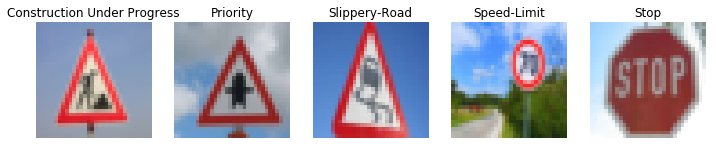

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

new_image_labels = ['Construction Under Progress', 'Priority', 'Slippery-Road', 'Speed-Limit', 'Stop']
new_image_set = []

def resize_image(image_file):
    image = plt.imread(NEW_TEST_FOLDER + image_file)
    return imresize(image, (32, 32))

def display_new_test_images():
    new_image_list = os.listdir(NEW_TEST_FOLDER)
    index = 1
    fig = plt.figure(figsize=(12, 6)) 
    for image_run, image_name in enumerate(new_image_list):
        plt.subplot(1, 5, image_run+1)
        resized_image = resize_image(image_name)
        new_image_set.append(resized_image)
        plt.imshow(resized_image)
        plt.axis('off')
        plt.title(new_image_labels[image_run])
    plt.show()
    
display_new_test_images()
new_test_dataset = np.array(new_image_set, dtype=np.float64)
#preprocessing
pre_process_data(new_test_dataset)

The above traffic sign images were downloaded from the web. I expect my network to classify three images (Construction Under Progress, Priority, Stop) correctly as they are quite similar to training images. Since slippery road image was bit distorted I was unsure about network prediction. Also for the speed limit image, since there is a lot of intensity variation because of the background (green vegetation), I thought it will be difficult to be detected correctly.  

### Predict the Sign Type for Each Image

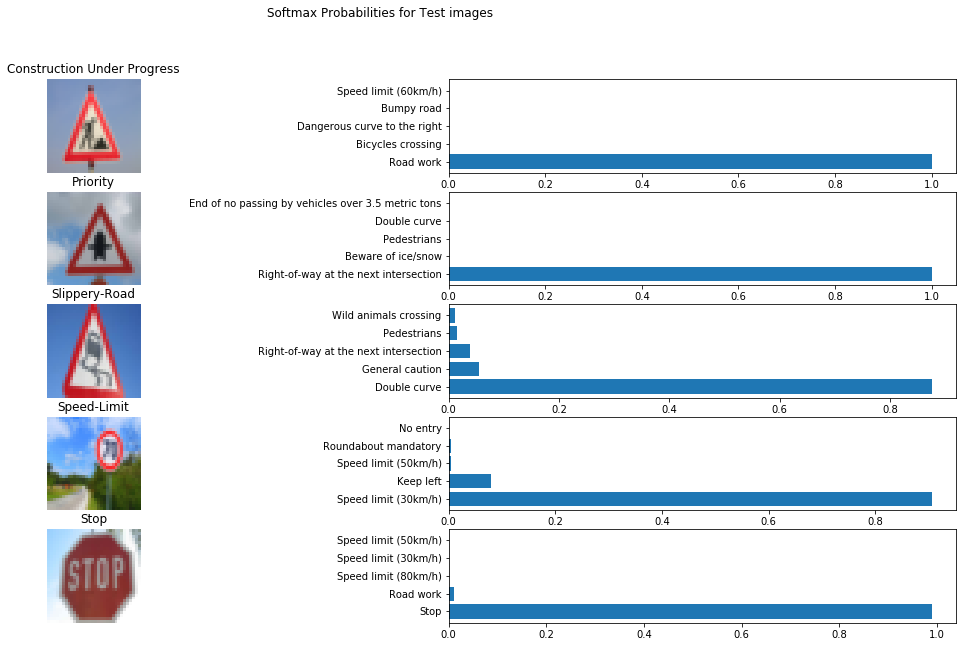

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# run the model on the test data
def plot_the_results(labels, prob, indices):
    class_name = pd.read_csv('./data/signnames.csv')['SignName'].values
    fig = plt.figure(figsize=(20, 10))
    for each_run in range(len(new_image_set)):
        each_image = new_image_set[each_run]
        each_label = labels[each_run]
        each_prob = prob[each_run]
        each_indices = indices[each_run]
        predicted_class_names = [class_name[each_index] for each_index in each_indices]
        plt.subplot(len(new_image_set), 2, 2*each_run + 1)
        plt.imshow(each_image)
        plt.axis('off')
        plt.title(each_label)
        plt.subplot(len(new_image_set), 2, 2*each_run + 2)
        plt.barh(np.arange(len(labels)), each_prob)
        plt.yticks(np.arange(len(labels)), predicted_class_names)
    plt.suptitle('Softmax Probabilities for Test images')
    plt.show()

with tf.Session() as sess:
    saver.restore(sess, MODEL_NAME)
    softmax = tf.nn.softmax(logits)
    prob_score = sess.run(softmax, feed_dict={x: new_test_dataset, keep_prob: 1.0})    
    top_k_op = tf.nn.top_k(prob_score, k=5)
    top_k_results = sess.run(top_k_op)
    plot_the_results(new_image_labels, top_k_results.values, top_k_results.indices)



### Analyze Performance

Out of the five unseen images downloaded from the web, the network correctly predicted 3 images and the network was pretty sure of sure of its prediction as the probability values were almost near to 1 for the predicted class and negligible for other top 4 classes.

The speed limit image was also partially correct as the network has predicted it as speed-limit 30km/h where in the image it was 70km/h. The network predicted the speed limit (30km/hr) with a probability of 0.9 and 0.1 for keep left.Hence in this case also network was not in confusion mode. It was pretty sure about its prediction.

The slippery road signal was incorrectly identified as 'Double curve', which kind of make sense because the lines resemble the Double curve symbol. Also, network has predicted 'General Caution' as its second guess which is correct. Here also Double Curve was predicted with a probability of 0.9 but other 4 classes also have small probability values.

Since the network has an accuracy of 60% on images downloaded from internet and in the test set the accuracy was 94.6 %. It seems like the network is overfitting. 



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# Done above

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")